In [2]:
import pandas as pd
import os
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [4]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


# Lista de todos os ficheiros .wav

In [5]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]

fold1 = 'audio/fold1'
list1 = os.listdir(fold1)

fold2 = 'audio/fold2'
list2 = os.listdir(fold2)

fold3 = 'audio/fold3'
list3 = os.listdir(fold3)

fold4 = 'audio/fold4'
list4 = os.listdir(fold4)

fold5 = 'audio/fold5'
list5 = os.listdir(fold5)

fold6 = 'audio/fold6'
list6 = os.listdir(fold6)

fold7 = 'audio/fold7'
list7 = os.listdir(fold7)

fold8 = 'audio/fold8'
list8 = os.listdir(fold8)

fold9 = 'audio/fold9'
list9 = os.listdir(fold9)

fold10 = 'audio/fold10'
list10 = os.listdir(fold10)

lista = list1 + list2 + list3 + list4 + list5 + list6 + list7 + list8 + list9 + list10

In [6]:
#ha excecoes: audio/fold[]/.DS_store

def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    
    if not excerpt.empty:
        path_name = os.path.join('audio', 'fold'+str(excerpt.fold.values[0]), filename)
        return path_name
    
    else:
        return None

In [7]:
path_list=[]
for i in lista:
    p = path_class(i)
    if (p!=None):
        path_list.append(p)

#### Sample rate padrao

In [8]:
# Maior sampling rate

# Sampling rate, measured in Hertz (Hz), is the number of samples of audio carried per second
# Diferentes sampling rates

maximo = librosa.get_samplerate(path_list[0])
for j in range(1,len(path_list)):
    #print(librosa.get_samplerate(path_list[j]))
    if (librosa.get_samplerate(path_list[j])>maximo):
        maximo = librosa.get_samplerate(path_list[j])
print(maximo)

192000


In [112]:
# Verifica se é CD audio (um exemplo)
# O CD audio tem uma sample rate de 44,1 kHz = 44100 Hz.
# Portanto, se estiver a criar um CD audio, deve usar uma sample rate compativel.

import wave

filename = 'audio/fold5/100032-3-0-0.wav'
def check_cd_audio(filename):
    with wave.open(filename, 'rb') as wave_file:
        frame_rate = wave_file.getframerate()
        bit_depth = wave_file.getsampwidth() * 8
        channels = wave_file.getnchannels()

    if frame_rate == 44100 and bit_depth == 16 and channels == 2:
        return True
    else:
        return False

print(check_cd_audio(filename))

True


# Preprocessamento de todos os paths

### time = 4.0 ^ sr = 44100

In [ ]:
#sr = 44100 #sample rate padrao
desired = 4.0 #tempo do audio padrao
for i in path_list:
    i = f'{i}'
    y, sr = librosa.load(i)
    
    # Calcula a duração do áudio
    current = librosa.get_duration(y=y, sr=sr)
    
    #Inicializar y_extended
    y_extended = y
    
    # Modifica a duracao do audio
    if current < desired:
        
        # Calculate the number of times to repeat the audio to reach the desired duration
        
        # a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
        # np.ceil(a)
        # array([-1., -1., -0.,  1.,  2.,  2.,  2.])
        
        repeat = int(np.ceil(desired / current)*sr)

        # Repeat the audio
        # Repeat the data zero (repeat) times
    
        zero = np.zeros(1)
    
        repeated_zeros = np.tile(zero, repeat)

        # Concatenate the arrays to create y_extended
        
        y_extended = np.concatenate([y] + [repeated_zeros])

        # Trim the array to the desired duration
        # [:int(desired * sr)] : ensure that the extended audio is truncated to match the desired duration in samples
    
        y_extended = y_extended[:int(desired * sr)]
    
    # Verifica a duração do audio modificado
    #print(f'Arquivo: {i}, Duração atual: {librosa.get_duration(y=y, sr=sr)} segundos')

    # Cria wave
    #librosa.display.waveshow(y_extended)

#### Results

In [345]:
filename = 'audio/fold5/100032-3-0-0.wav'
sr = 44100
desired=4.0
y, sr = librosa.load(filename)
current = librosa.get_duration(y=y, sr=sr)
    
#Inicializar y_extended
y_extended = y
    
# Modifica a duracao do audio
if current < desired:
        
    repeat = int(np.ceil(desired / current)*sr)
    
    zero = np.zeros(1)
    
    repeated_zeros = np.tile(zero, repeat)

    # Concatenate the arrays to create y_extended
    y_extended = np.concatenate([y] + [repeated_zeros])

    # Trim the array to the desired duration
    y_extended = y_extended[:int(desired * sr)]

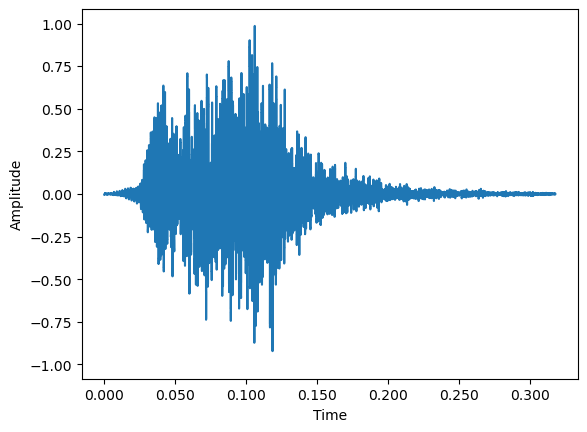

In [346]:
librosa.display.waveshow(y)
plt.ylabel("Amplitude")
plt.show()

Audio(data=y, rate=sr)

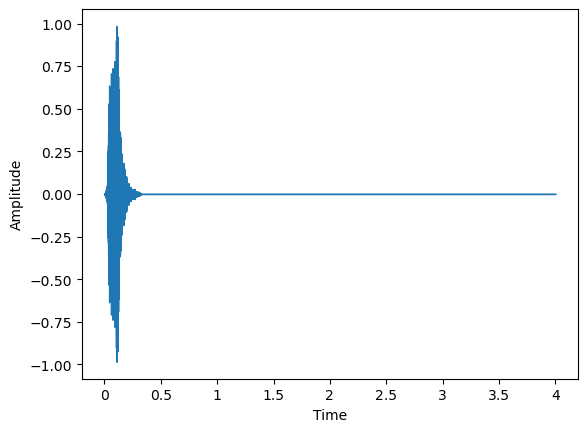

In [347]:
wave = librosa.display.waveshow(y_extended)
plt.ylabel("Amplitude")
plt.show()

Audio(data=y_extended, rate=sr)

# Extract Features

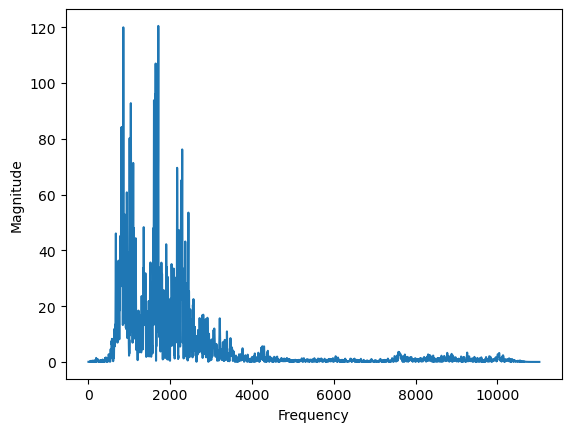

In [348]:
# fft : spectrum
# frequency domain

fft = np.fft.fft(y_extended)  # |fft| = sr * time (4.0)

magnitude = np.abs(fft)

frequency = np.linspace(0,sr,len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency,left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

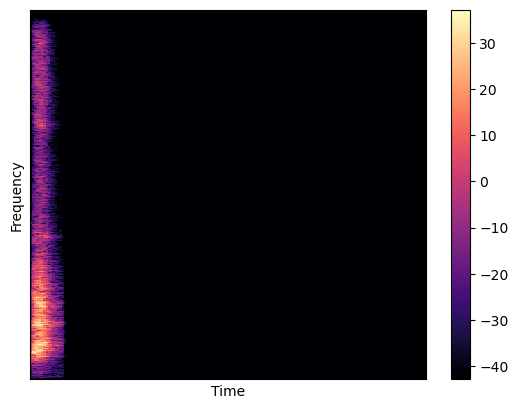

In [349]:
# stft : spectrogram
# time-frequency domain

n_fft = 2048

hop_length = 512

stft = librosa.core.stft(y_extended, hop_length = hop_length, n_fft = n_fft)

spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)  #Convert the magnitude spectrogram to a decibel (dB) scale.

librosa.display.specshow(log_spectrogram, sr=sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

Decibel (dB) scale

https://www.google.com/url?sa=i&url=https%3A%2F%2Fscopelabs.eu%2Fblog%2Fdecibels-what-do-they-do%2F&psig=AOvVaw0BErYVpCgMKH9mP3V5kal1&ust=1699988154797000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCLjJu8LTwYIDFQAAAAAdAAAAABAE![image.png](attachment:image.png)

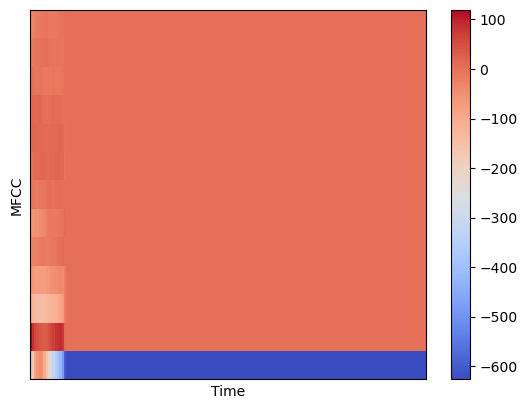

(13, 173)


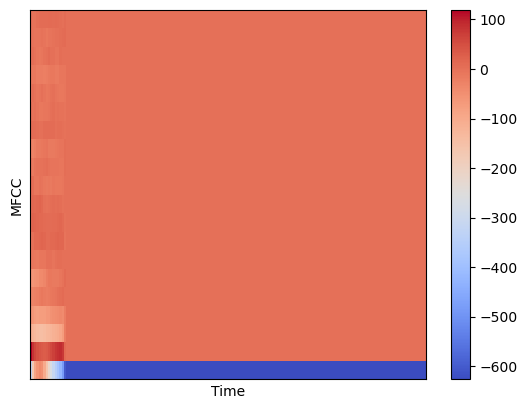

(20, 173)


In [350]:
# MFCCs

MFCCs = librosa.feature.mfcc(y=y_extended, n_fft=n_fft , hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()
print(MFCCs.shape)

#default n_mfcc = 20
mfccs = librosa.feature.mfcc(y=y_extended, sr=sr)
librosa.display.specshow(mfccs, sr=sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()
print(mfccs.shape)

In [351]:
# Default beat tracker

tempo, beat_frames = librosa.beat.beat_track(y=y_extended, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 117.45 beats per minute


In [352]:
beat_times = librosa.frames_to_time(beat_frames)
beat_times

array([0.06965986])

(-1.0, 1.0)

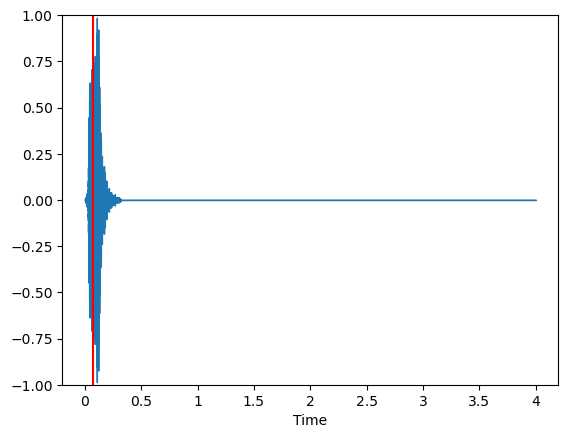

In [353]:
librosa.display.waveshow(y_extended)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)

In [354]:
# Sine Wave
# The graph of a sound wave is a simple sine wave only if the sound has only one frequency component in it.

# The plot shows the amplitude of the sine wave over time, 
# and the audio provides an auditory representation of the same sine wave.

# Nao se está a aplicar ao nosso dataset

time_x = np.linspace(0, desired, int(desired*sr), endpoint=False) 

In [355]:
x = 0.5*np.sin(2 * np.pi * 600 * time_x) 

#sine wave with a frequency of 220 Hz and an amplitude of 0.5 over the given time values
# se mudarmos para maior frequency => som mais agudo
# se mudarmos para menor frequency => som mais grave

# amplitude nao parece alterar nada

In [356]:
amplitude = np.sin(time_x)

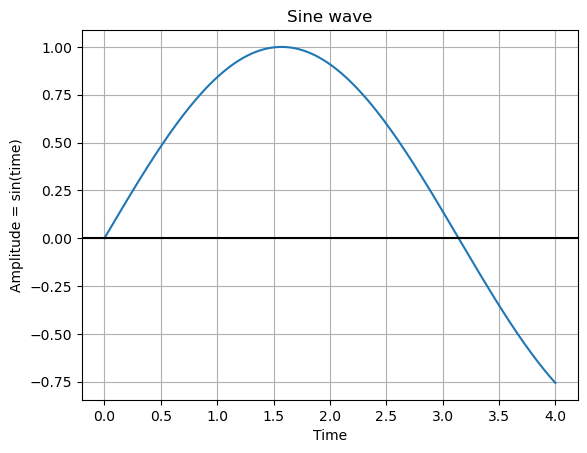

In [357]:
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time_x, amplitude)
# Give a title for the sine wave plot
plt.title('Sine wave')
# Give x axis label for the sine wave plot
plt.xlabel('Time')
# Give y axis label for the sine wave plot
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the sine wave
plt.show()

Audio(data=x, rate=sr)

#### Spectral Features

In [358]:
all = {
    "chroma_stft",
    "chroma_cqt",
    "chroma_cens",
    "chroma_vqt",
    "melspectrogram",
    "mfcc",
    "rms",
    "spectral_centroid",
    "spectral_bandwidth",
    "spectral_contrast",
    "spectral_flatness",
    "spectral_rolloff",
    "poly_features",
    "tonnetz",
    "zero_crossing_rate"
    }

#### chroma_stft

representation of the energy distribution of different pitch classes in an audio signal

##Chroma shape##

(12,173) vs (12,87)

(12, 173): This shape indicates a chromagram where the analysis is conducted over 173 time frames. 
Each column of the matrix represents the chromagram for a specific time frame, and there are 173 such time frames.

(12, 87): On the other hand, the shape (12, 87) suggests a chromagram analysis over 87 time frames. 
Similar to the previous case, each column of the matrix represents the chromagram for a specific time frame, but there are 87 such time frames.

A larger number of time frames generally provides a more detailed analysis of how the harmonic content evolves over time, but it may also increase computational complexity.

In [359]:
# Use an energy (magnitude) spectrum instead of power spectrogram

chroma = librosa.feature.chroma_stft(y=y_extended, S=spectrogram, sr=sr)
print(chroma)
print()
print(chroma.shape)

[[0.3480863  0.2307427  0.36729631 ... 0.         0.         0.        ]
 [0.28259629 0.14957986 0.31897338 ... 0.         0.         0.        ]
 [0.22350121 0.1556939  0.34086275 ... 0.         0.         0.        ]
 ...
 [0.49368823 0.51998353 0.66519536 ... 0.         0.         0.        ]
 [0.28738474 0.26574312 0.43334086 ... 0.         0.         0.        ]
 [0.21755126 0.23920677 0.36789781 ... 0.         0.         0.        ]]

(12, 173)


In [360]:
# Use a pre-computed power spectrogram with a larger frame

higher_frame = librosa.core.stft(y=y_extended, n_fft=4096)  #em vez de stft
spect = np.abs(higher_frame)  #em vez de spectrogram
chroma = librosa.feature.chroma_stft(S=spect, sr=sr)
print(chroma)
print()
print(chroma.shape)

[[0.26090356 0.52539903 0.73665976 ... 0.         0.         0.        ]
 [0.23772139 0.5560534  0.75782469 ... 0.         0.         0.        ]
 [0.26799007 0.43686117 0.47026381 ... 0.         0.         0.        ]
 ...
 [0.42519317 0.56793855 0.58107731 ... 0.         0.         0.        ]
 [0.33167716 0.44252372 0.45303323 ... 0.         0.         0.        ]
 [0.3307952  0.47964367 0.54379789 ... 0.         0.         0.        ]]

(12, 87)


In [361]:
#Ao usar uma janela de Fourier (FFT) maior, como 4096, estamos observando uma gama maior de frequências,
#o que pode nos dar uma imagem mais detalhada do som. 
#No entanto, isso também pode resultar em maior variação entre as amostras, 
#tornando-se mais difícil para o modelo aprender o padrão.

#DEVEMOS EXPERIMENTAR DIFERENTES FFTs
#PODE AUMENTAR OU DIMINUIR A EFICACIA DO MODELO

#### chroma_cqt
Constant-Q chromagram

CQT divides the frequency range into non-overlapping constant-Q bins.
This is in contrast to the linearly spaced frequency bins in the STFT.

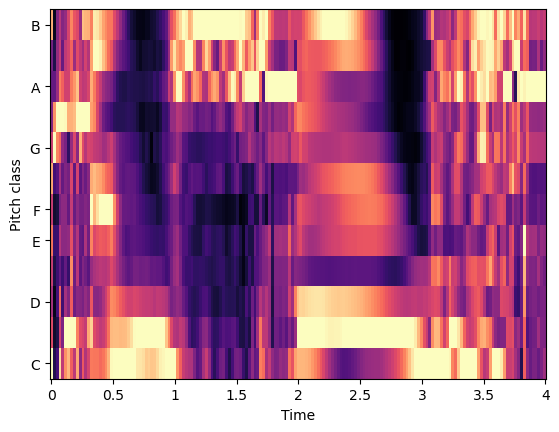

In [362]:
chroma_cq = librosa.feature.chroma_cqt(y=y_extended, sr=sr)
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')

#### chroma_cens
Compute the chroma variant “Chroma Energy Normalized” (CENS)

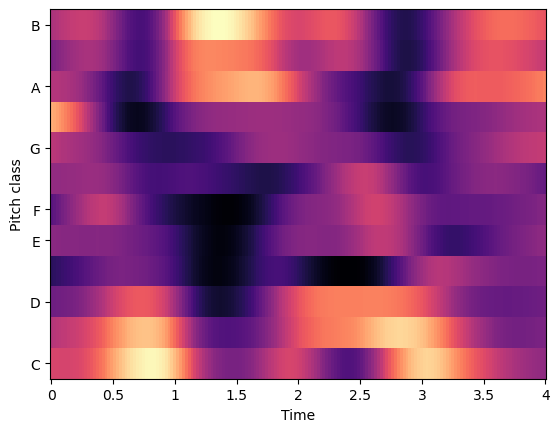

In [363]:
chroma_cens = librosa.feature.chroma_cens(y=y_extended, sr=sr)
img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')

#### chroma_vqt
Variable-Q chromagram

/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1379
  warnings.warn(


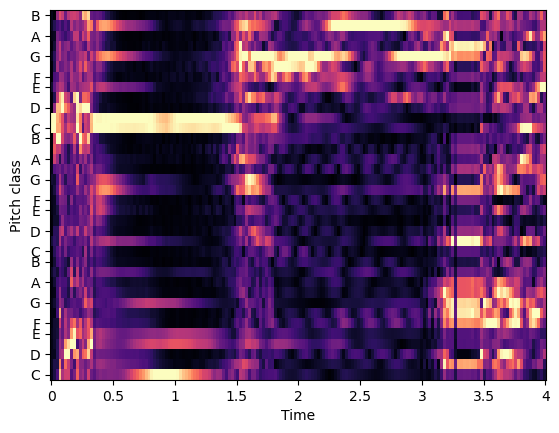

In [364]:
n_bins=36
chroma_vq = librosa.feature.chroma_vqt(y=y_extended, sr=sr, intervals='ji5', bins_per_octave=n_bins)
img = librosa.display.specshow(chroma_vq, y_axis='chroma', x_axis='time')

#### melspectrogram
Compute a mel-scaled spectrogram.

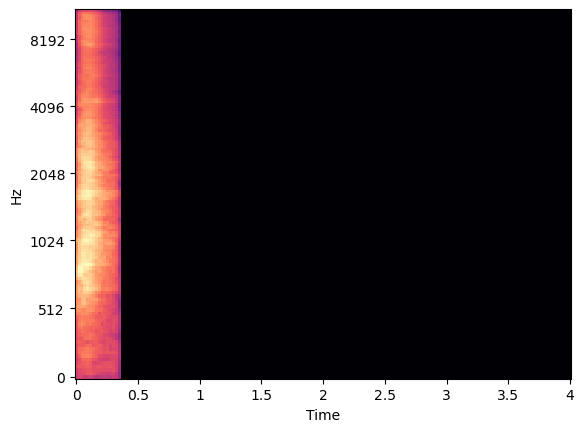

In [365]:
S = librosa.feature.melspectrogram(S=spectrogram, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)

#### rms

Compute root-mean-square (RMS) value for each frame from the audio samples y

In [366]:
librosa.feature.rms(y=y_extended)

array([[0.10763185, 0.15715021, 0.21954489, 0.2741894 , 0.27822244,
        0.25807613, 0.20924622, 0.1304906 , 0.0578145 , 0.03270024,
        0.02005574, 0.01201498, 0.00783594, 0.00524213, 0.00317654,
        0.00134479, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [367]:
print(rms.shape)

(1, 10)


Compute root-mean-square (RMS) value for each frame from a spectrogram S

Using a spectrogram will give a more accurate representation of energy over time because its frames can be windowed.

[Text(0.5, 1.0, 'log Power spectrogram')]

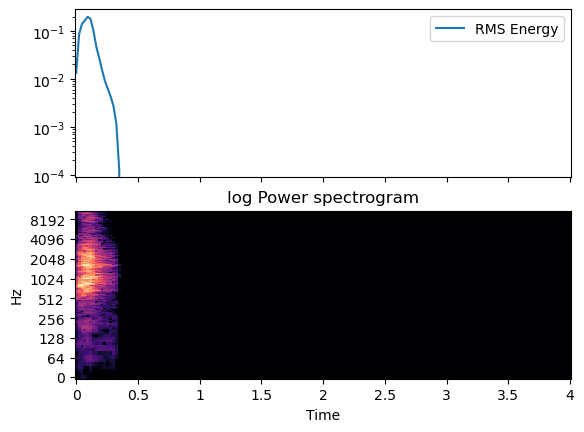

In [368]:
S, phase = librosa.magphase(stft)
rms = librosa.feature.rms(S=S)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [369]:
print(rms.shape)

(1, 173)


[Text(0.5, 1.0, 'log Power spectrogram')]

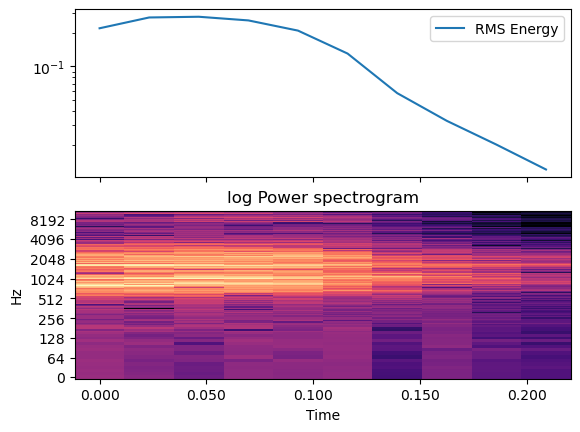

In [370]:
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [371]:
print(rms.shape)

(1, 10)


##rms shape##

For instance, if these are RMS values over time, (1, 173) might provide a more detailed analysis over 173 time frames, whereas (1, 10) would offer a more concise representation covering only 10 time frames.

#### spectral_centroid

Compute the spectral centroid.

       Weighted mean of the frequencies present in the sound.

Spectral centroid indicates where the ”center of mass” for a sound is located.

    Consider two songs, one from a blues genre and the other belonging to metal.
    
    Now, as compared to the blues genre song, which is the same throughout its length, the metal song has more  frequencies towards the end.
    - For blues song spectral centroid will lie somewhere near the middle of its spectrum
    - For a metal song spectral centroid would be towards its end


In [372]:
all_cent = librosa.feature.spectral_centroid(y=y_extended, sr=sr)
print(all_cent)
print()
print(all_cent.shape)
cent = all_cent.mean()
print(cent)

[[1566.94043392 1753.23353444 1951.05222389 2118.83884756 2189.29842425
  2270.5440927  2321.19833464 2367.88295311 2264.19761607 2204.57553725
  2147.50728714 2073.24456697 2030.82576148 1998.5597787  1988.1738551
  2017.1366291     0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.          

In [373]:
S, phase = librosa.magphase(stft)
all_cent = librosa.feature.spectral_centroid(S=S)
print(all_cent)
print()
print(all_cent.shape)
cent = all_cent.mean()
print(cent)

[[1566.94043392 1753.23353444 1951.05222389 2118.83884756 2189.29842425
  2270.5440927  2321.19833464 2367.88295311 2264.19761607 2204.57553725
  2147.50728714 2073.24456697 2030.82576148 1998.5597787  1988.1738551
  2017.1366291     0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.          

In [374]:
freqs, times, D = librosa.reassigned_spectrogram(y_extended, fill_nan=True)
all_cent = librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)
print(all_cent)
print()
print(all_cent.shape)
cent = all_cent.mean()
print(cent)

[[1566.81001458 1753.20959806 1950.96148938 2118.76710682 2189.19737393
  2270.57159156 2321.45383838 2367.78079987 2264.224975   2204.68433058
  2147.59856439 2073.27798069 2030.77221629 1998.61500729 1988.16294417
  2017.14786055    0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.         

/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:788: RuntimeWarning: invalid value encountered in divide
  correction = -np.imag(S_dh / S_h)
/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:960: RuntimeWarning: invalid value encountered in divide
  correction = np.real(S_th / S_h)


[Text(0.5, 1.0, 'log Power spectrogram')]

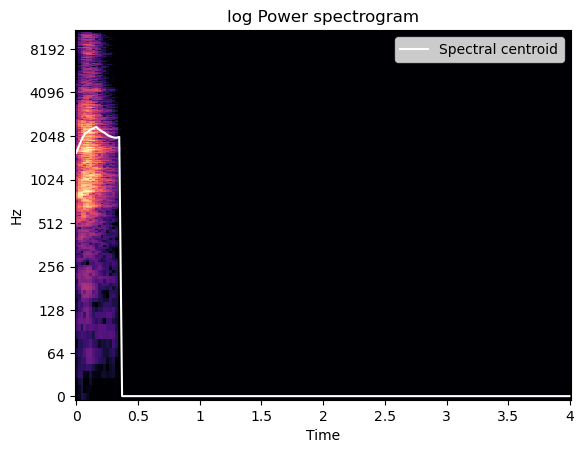

In [375]:
_ , _ , D = librosa.reassigned_spectrogram(y_extended, fill_nan=True)
times = librosa.times_like(all_cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S=np.abs(D), ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(times, all_cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

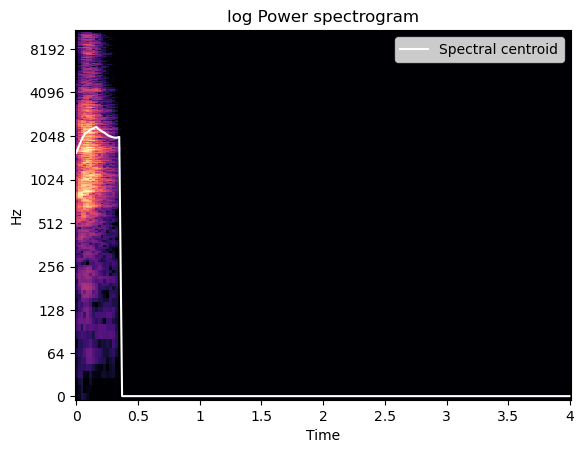

In [376]:
S, _ = librosa.magphase(stft)
times = librosa.times_like(all_cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S=S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(times, all_cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

#### Normaliza os valores de 0-1

In [377]:
from sklearn.preprocessing import minmax_scale

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

frames = range(len(all_cent[0]))

t = librosa.frames_to_time(frames)

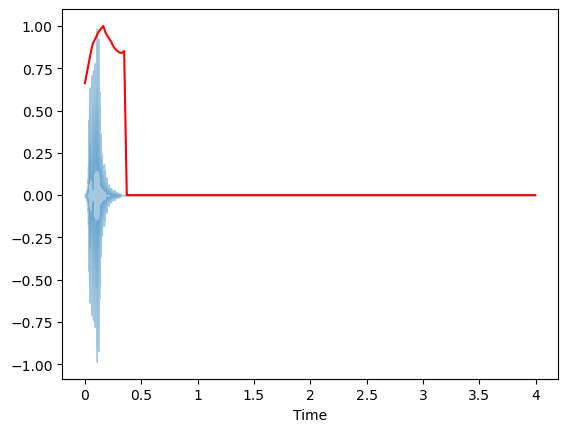

In [378]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y_extended, sr=sr, alpha=0.4)
plt.plot(t, normalize(all_cent[0]), color='r')

#### spectral_bandwidth

Compute p’th-order spectral bandwidth.

In [379]:
spec_bw = librosa.feature.spectral_bandwidth(y=y_extended, sr=sr)
spec_bw

array([[1397.49273902, 1601.62513822, 1728.03869107, 1801.74000023,
        1795.01677237, 1821.0678493 , 1900.51511652, 1993.89466501,
        1899.87292887, 1774.99062995, 1700.45169827, 1643.2819514 ,
        1621.12588146, 1627.53864663, 1643.7324703 , 1686.32617059,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [380]:
librosa.feature.spectral_bandwidth(S=S)

array([[1397.49273902, 1601.62513822, 1728.03869107, 1801.74000023,
        1795.01677237, 1821.0678493 , 1900.51511652, 1993.89466501,
        1899.87292887, 1774.99062995, 1700.45169827, 1643.2819514 ,
        1621.12588146, 1627.53864663, 1643.7324703 , 1686.32617059,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [381]:
freqs, times, D = librosa.reassigned_spectrogram(y_extended, fill_nan=True)
librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:788: RuntimeWarning: invalid value encountered in divide
  correction = -np.imag(S_dh / S_h)
/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:960: RuntimeWarning: invalid value encountered in divide
  correction = np.real(S_th / S_h)


array([[1397.3770954 , 1601.6324076 , 1728.07174977, 1801.745083  ,
        1795.01345606, 1821.06800479, 1900.37012251, 1993.91108201,
        1899.84623373, 1774.922776  , 1700.40162285, 1643.17760723,
        1621.15987436, 1627.53994902, 1643.72299983, 1686.14907404,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

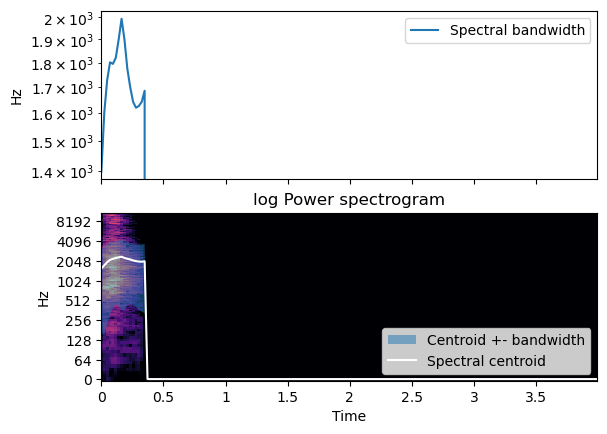

In [382]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]), np.minimum(centroid[0] + spec_bw[0], sr/2), alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

#### spectral_rolloff

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. 

This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

In [383]:
# From time-series input

In [419]:
rolloff = librosa.feature.spectral_rolloff(y=y_extended, sr=sr, roll_percent=0.99)
print(rolloff_max.shape)

(1, 173)


In [420]:
rolloff

array([[9054.71191406, 9506.90917969, 9668.40820312, 9829.90722656,
        9862.20703125, 9808.37402344, 9776.07421875, 9808.37402344,
        9711.47460938, 9571.50878906, 9356.17675781, 9291.57714844,
        9302.34375   , 9323.87695312, 9280.81054688, 9356.17675781,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [386]:
rolloff_min = librosa.feature.spectral_rolloff(y=y_extended, sr=sr, roll_percent=0.01)
print(rolloff_min.shape)

(1, 173)


In [387]:
rolloff_min

array([[430.6640625 , 538.33007812, 570.62988281, 581.39648438,
        645.99609375, 656.76269531, 645.99609375, 602.9296875 ,
        592.16308594, 527.56347656, 452.19726562, 301.46484375,
        215.33203125, 161.49902344, 139.96582031, 139.96582031,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [388]:
# From spectrogram input

In [389]:
S, phase = librosa.magphase(stft)
ro = librosa.feature.spectral_rolloff(S=S, sr=sr)
print(ro.shape)

(1, 173)


In [390]:
ro

array([[2497.8515625 , 2573.21777344, 2616.28417969, 2810.08300781,
        2896.21582031, 2896.21582031, 3014.6484375 , 3520.67871094,
        3229.98046875, 3036.18164062, 2863.91601562, 2820.84960938,
        2745.48339844, 2734.71679688, 2723.95019531, 2745.48339844,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [391]:
ro = librosa.feature.spectral_rolloff(y=y_extended, sr=sr, roll_percent=0.95) #higher roll percent
print(ro.shape)

(1, 173)


In [392]:
ro

array([[3477.61230469, 4209.74121094, 5447.90039062, 6922.92480469,
        7202.85644531, 7515.08789062, 7622.75390625, 7870.38574219,
        7439.72167969, 6556.86035156, 6126.19628906, 5695.53222656,
        5523.26660156, 5458.66699219, 5512.5       , 5706.29882812,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

[Text(0.5, 1.0, 'log Power spectrogram')]

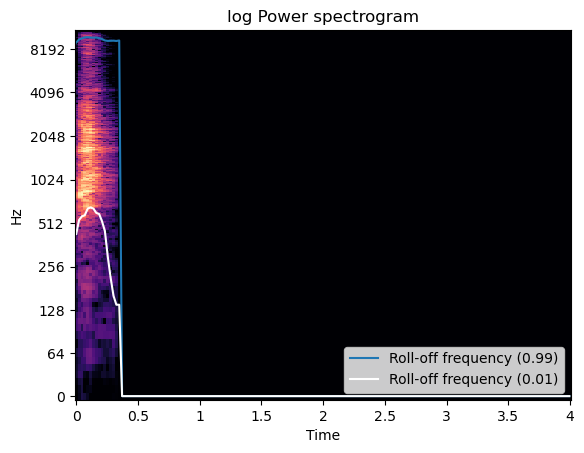

In [393]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w', label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

#### poly_features

Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.

In [394]:
S = np.abs(stft)

In [395]:
#Fit a degree-0 polynomial (constant) to each frame
p0 = librosa.feature.poly_features(S=S, order=0)

In [396]:
#Fit a linear polynomial to each frame
p1 = librosa.feature.poly_features(S=S, order=1)

In [397]:
#Fit a quadratic to each frame
p2 = librosa.feature.poly_features(S=S, order=2)

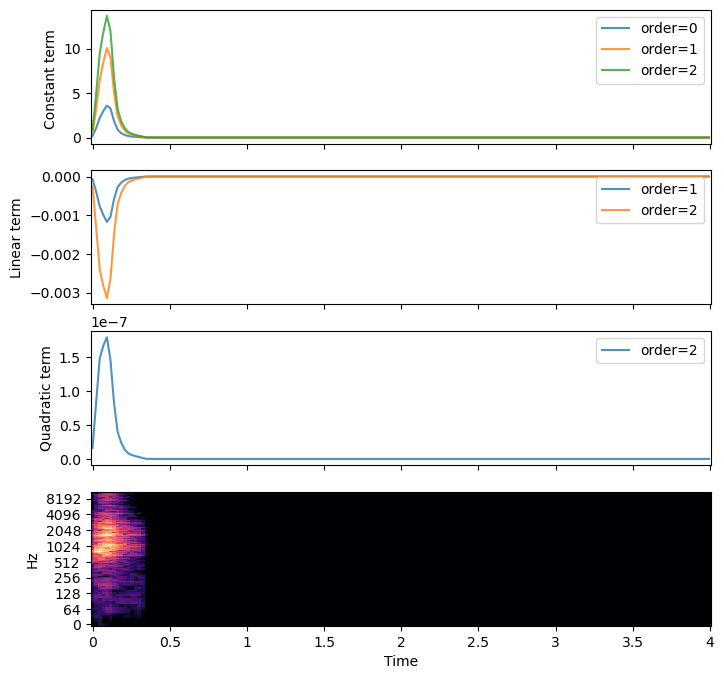

In [398]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[3])

#### tonnetz

Compute the tonal centroid features (tonnetz).

In [399]:
y_harmonic = librosa.effects.harmonic(y_extended)
tonnetz = librosa.feature.tonnetz(y=y_harmonic, sr=sr)

In [400]:
tonnetz

array([[ 1.16445924e-01, -4.18526570e-02, -1.23365071e-02, ...,
         1.27532033e-01,  1.23246523e-01,  1.17496027e-01],
       [-2.45520357e-02, -6.36996346e-02, -9.94509681e-02, ...,
         9.68604430e-02,  9.42394350e-02,  9.27792621e-02],
       [-1.05504855e-03, -4.94561720e-02, -2.15623525e-02, ...,
         6.71099473e-02,  6.96217664e-02,  6.46548268e-02],
       [ 1.84026152e-01,  3.04925789e-01,  2.71553579e-01, ...,
        -3.03153277e-02, -3.74435627e-02, -3.90440176e-02],
       [-4.37900029e-02, -3.97388390e-02, -7.28194224e-02, ...,
         6.37010539e-02,  6.39007720e-02,  6.04253607e-02],
       [ 2.53429829e-02, -1.17037599e-04, -3.03705417e-02, ...,
        -1.30179311e-02, -1.68443451e-02, -1.68795812e-02]])

/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=438
  warnings.warn(
/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=219
  warnings.warn(
/Users/mafaldaaires/anaconda3/envs/ACII/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=110
  warnings.warn(


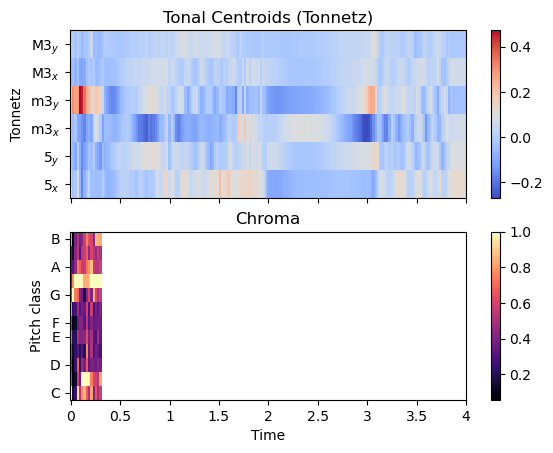

In [401]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr), y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

####  zero-crossing rate
Caracteriza a quantidade de vezes que um sinal de áudio atravessa a linha de zero em um determinado período de tempo.

Serve para avaliar a "agitabilidade" ou a mudança de polaridade em um sinal de áudio.

In [402]:
S = librosa.feature.zero_crossing_rate(y_extended)

In [403]:
print(S)

[[0.04736328 0.08056641 0.11425781 0.12451172 0.14013672 0.14160156
  0.14599609 0.14257812 0.14404297 0.14501953 0.140625   0.14111328
  0.12890625 0.09277344 0.05957031 0.02490234 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         

In [404]:
print(S.mean())

0.010485345917630057


#### Rhythm Features

In [405]:
all = {
    "tempo",
    "tempogram",
    "fourier_tempogram",
    "tempogram_ratio"
}

#### tempo

Estimate the tempo (beats per minute)

In [406]:
# Estimate a static tempo

onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)

[129.19921875]


In [407]:
# Or a static tempo with a uniform prior instead
import scipy.stats

prior = scipy.stats.uniform(30, 300)  # uniform over 30-300 BPM
utempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr, prior=prior)
print(utempo)

[258.3984375]


In [408]:
# Or a dynamic tempo

dtempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
print(dtempo)

[135.99917763 135.99917763 135.99917763 135.99917763 135.99917763
 129.19921875 129.19921875 129.19921875 129.19921875 129.19921875
 129.19921875 129.19921875 129.19921875 129.19921875]


In [409]:
# Dynamic tempo with a proper log-normal prior

prior_lognorm = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
dtempo_lognorm = librosa.feature.tempo(onset_envelope=onset_env, sr=sr, aggregate=None, prior=prior_lognorm)
print(dtempo_lognorm)

[75.99954044 75.99954044 75.99954044 73.828125   73.828125   73.828125
 73.828125   73.828125   73.828125   73.828125   73.828125   73.828125
 71.77734375 71.77734375]


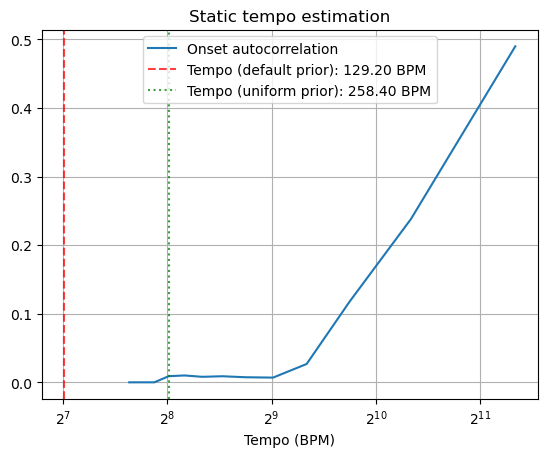

In [410]:
# Plot the estimated tempo against the onset autocorrelation

import matplotlib.pyplot as plt
# Convert to scalar
tempo = tempo.item()
utempo = utempo.item()
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, max_size=2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr, hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
fig, ax = plt.subplots()
ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:], label='Onset autocorrelation', base=2)
ax.axvline(tempo, 0, 1, alpha=0.75, linestyle='--', color='r', label='Tempo (default prior): {:.2f} BPM'.format(tempo))
ax.axvline(utempo, 0, 1, alpha=0.75, linestyle=':', color='g', label='Tempo (uniform prior): {:.2f} BPM'.format(utempo))
ax.set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax.grid(True)
ax.legend()

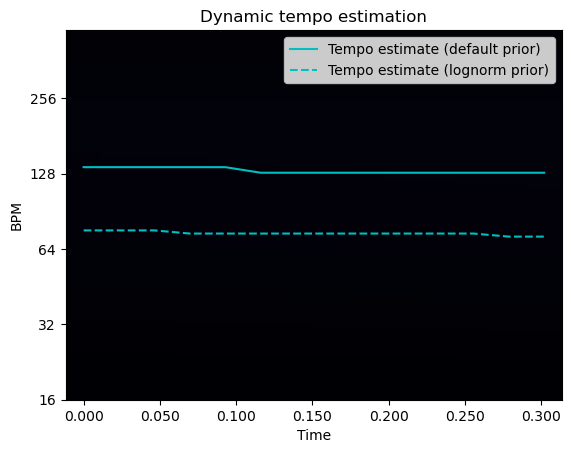

In [411]:
# Plot dynamic tempo estimates over a tempogram

fig, ax = plt.subplots()
tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr, hop_length=hop_length)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
ax.plot(librosa.times_like(dtempo), dtempo, color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax.plot(librosa.times_like(dtempo_lognorm), dtempo_lognorm, color='c', linewidth=1.5, linestyle='--', label='Tempo estimate (lognorm prior)')
ax.set(title='Dynamic tempo estimation')
ax.legend()

#### tempogram

Compute the tempogram: local autocorrelation of the onset strength envelope.

In [412]:
# Compute local onset autocorrelation
y, sr = librosa.load(librosa.ex('nutcracker'), duration=30)
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.feature.tempo(onset_envelope=oenv, sr=sr, hop_length=hop_length)[0]

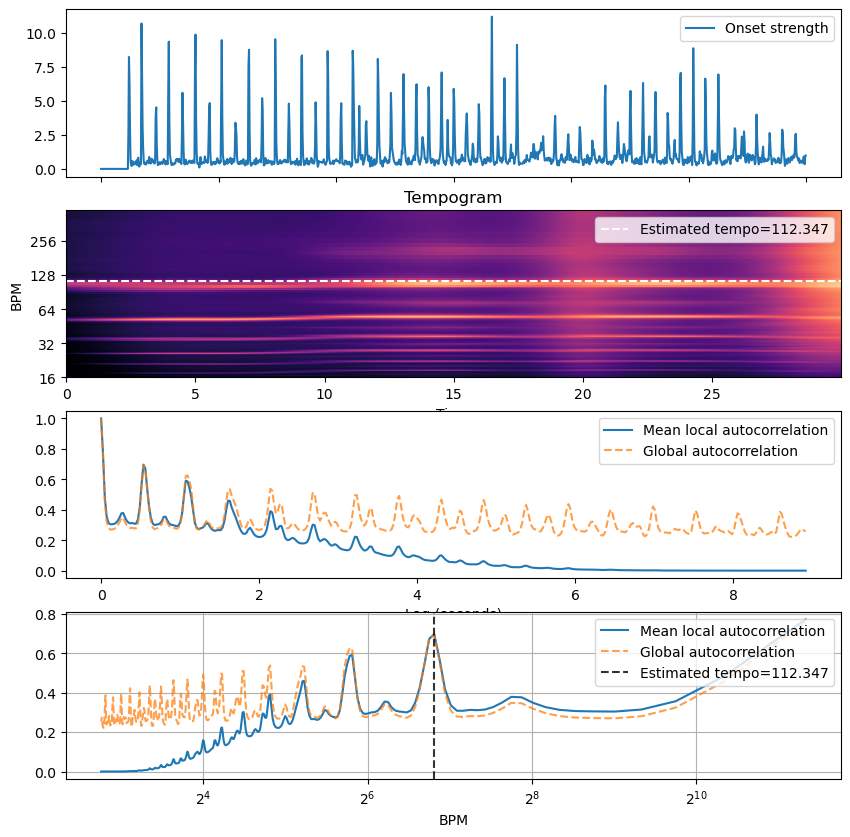

In [413]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1), label='Mean local autocorrelation', base=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75, label='Global autocorrelation', base=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

#### fourier_tempogram

Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope.

In [414]:
# Compute local onset autocorrelation
y, sr = librosa.load(librosa.ex('nutcracker'))
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
# Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length, norm=None)

[Text(0.5, 1.0, 'Autocorrelation tempogram')]

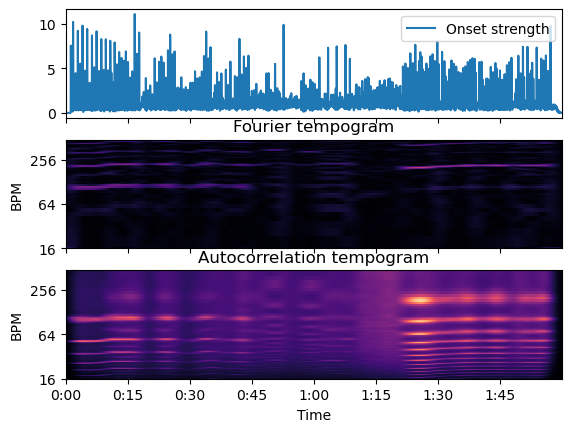

In [415]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(librosa.times_like(oenv), oenv, label='Onset strength')
ax[0].legend(frameon=True)
ax[0].label_outer()
librosa.display.specshow(np.abs(tempogram), sr=sr, hop_length=hop_length, x_axis='time', y_axis='fourier_tempo', cmap='magma', ax=ax[1])
ax[1].set(title='Fourier tempogram')
ax[1].label_outer()
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[2])
ax[2].set(title='Autocorrelation tempogram')

#### tempogram_ratio

Tempogram ratio features, also known as spectral rhythm patterns.

[Text(0.5, 1.0, 'Tempogram ratio')]

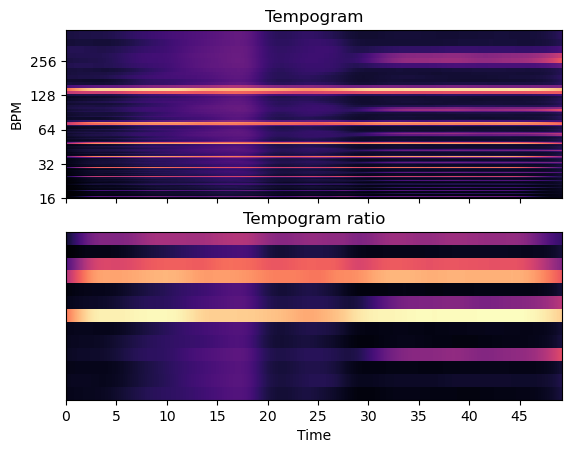

In [416]:
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('sweetwaltz'))
tempogram = librosa.feature.tempogram(y=y, sr=sr)
tgr = librosa.feature.tempogram_ratio(tg=tempogram, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(tempogram, x_axis='time', y_axis='tempo', ax=ax[0])
librosa.display.specshow(tgr, x_axis='time', ax=ax[1])
ax[0].label_outer()
ax[0].set(title="Tempogram")
ax[1].set(title="Tempogram ratio")

#### Introduzir no Dataset

In [417]:
df.loc[df['slice_file_name'] == filename, 'zero-crossing'] = S.mean()

#### Normaliza valores 

In [418]:
from sklearn.preprocessing import minmax_scale

# x é a feature (ver spectral_centroid)
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)